In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 文件路径

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 设置分类数

In [3]:
NUM_CLASSES = 6

# 读入学习数据

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# 构建模型

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 模型检查点的回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期终止用回拨
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# 模型编译
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 训练

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


42/49 [========================>.....] - ETA: 0s - loss: 1.7503 - accuracy: 0.2241 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 1s 5ms/step - loss: 1.7404 - accuracy: 0.2330 - val_loss: 1.6056 - val_accuracy: 0.5430
Epoch 2/1000
44/49 [=========================>....] - ETA: 0s - loss: 1.5998 - accuracy: 0.3493
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 1.5957 - accuracy: 0.3514 - val_loss: 1.4288 - val_accuracy: 0.5763
Epoch 3/1000
47/49 [===========================>..] - ETA: 0s - loss: 1.4542 - accuracy: 0.4255

D:\anaconda\envs\cv311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 1.4528 - accuracy: 0.4261 - val_loss: 1.2312 - val_accuracy: 0.6559
Epoch 4/1000
 1/49 [..............................] - ETA: 0s - loss: 1.3644 - accuracy: 0.4844
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 1.3118 - accuracy: 0.4962 - val_loss: 1.0438 - val_accuracy: 0.6853
Epoch 5/1000
 1/49 [..............................] - ETA: 0s - loss: 1.2793 - accuracy: 0.4922
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 1.1951 - accuracy: 0.5311 - val_loss: 0.9185 - val_accuracy: 0.7075
Epoch 6/1000
 1/49 [..............................] - ETA: 0s - loss: 1.1549 - accuracy: 0.5078
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [=============

49/49 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.7170 - val_loss: 0.3855 - val_accuracy: 0.8866
Epoch 31/1000
 1/49 [..............................] - ETA: 0s - loss: 0.6678 - accuracy: 0.7266
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.7236 - val_loss: 0.3665 - val_accuracy: 0.9228
Epoch 32/1000
 1/49 [..............................] - ETA: 0s - loss: 0.6671 - accuracy: 0.7812
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.7286 - val_loss: 0.3660 - val_accuracy: 0.9151
Epoch 33/1000
 1/49 [..............................] - ETA: 0s - loss: 0.7309 - accuracy: 0.7109
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.7265 - va

Epoch 58/1000
 1/49 [..............................] - ETA: 0s - loss: 0.7565 - accuracy: 0.7109
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7649 - val_loss: 0.2904 - val_accuracy: 0.9382
Epoch 59/1000
 1/49 [..............................] - ETA: 0s - loss: 0.4838 - accuracy: 0.7969
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7665 - val_loss: 0.2891 - val_accuracy: 0.9344
Epoch 60/1000
 1/49 [..............................] - ETA: 0s - loss: 0.7299 - accuracy: 0.7656
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7707 - val_loss: 0.2913 - val_accuracy: 0.9291
Epoch 61/1000
 1/49 [..............................] - ETA: 0s - loss: 0.5874 - accuracy: 0

49/49 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.8013
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8013 - val_loss: 0.2452 - val_accuracy: 0.9416
Epoch 86/1000
 1/49 [..............................] - ETA: 0s - loss: 0.6188 - accuracy: 0.7734
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7924 - val_loss: 0.2518 - val_accuracy: 0.9416
Epoch 87/1000
 1/49 [..............................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7500
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7810 - val_loss: 0.2500 - val_accuracy: 0.9459
Epoch 88/1000
 1/49 [..............................] - ETA: 0s - loss: 0.4845 - accuracy: 0.8438
Epoch 88

 1/49 [..............................] - ETA: 0s - loss: 0.5681 - accuracy: 0.7812
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.8060 - val_loss: 0.2392 - val_accuracy: 0.9445
Epoch 113/1000
 1/49 [..............................] - ETA: 0s - loss: 0.5771 - accuracy: 0.7734
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7992 - val_loss: 0.2452 - val_accuracy: 0.9455
Epoch 114/1000
 1/49 [..............................] - ETA: 0s - loss: 0.5340 - accuracy: 0.8438
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.8016 - val_loss: 0.2448 - val_accuracy: 0.9411
Epoch 115/1000
 1/49 [..............................] - ETA: 0s - loss: 0.4589 - accuracy: 0.8125
Ep

Epoch 139/1000
 1/49 [..............................] - ETA: 0s - loss: 0.4744 - accuracy: 0.8203
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.8119 - val_loss: 0.2326 - val_accuracy: 0.9464
Epoch 140/1000
 1/49 [..............................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7891
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.8124 - val_loss: 0.2347 - val_accuracy: 0.9445
Epoch 141/1000
 1/49 [..............................] - ETA: 0s - loss: 0.4857 - accuracy: 0.8047
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
49/49 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.8119 - val_loss: 0.2351 - val_accuracy: 0.9416
Epoch 142/1000
 1/49 [..............................] - ETA: 0s - loss: 0.5048 - accu

In [12]:
# 模型评价
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 748us/step - loss: 0.2483 - accuracy: 0.9416


In [13]:
# 保存的模型的载入
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推理测试
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 59ms/step
[9.6645852e-04 6.2202346e-03 1.3528887e-05 6.9319946e-01 2.9960024e-01
 4.5435264e-10]
3


# 混淆矩阵

65/65 [==============================] - 0s 701us/step


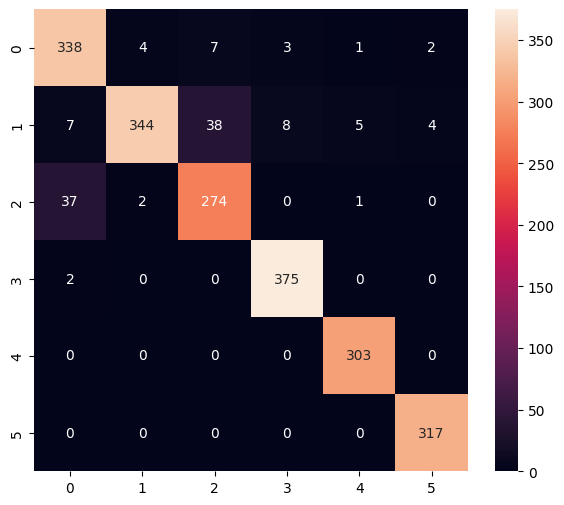

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       355
           1       0.98      0.85      0.91       406
           2       0.86      0.87      0.87       314
           3       0.97      0.99      0.98       377
           4       0.98      1.00      0.99       303
           5       0.98      1.00      0.99       317

    accuracy                           0.94      2072
   macro avg       0.94      0.94      0.94      2072
weighted avg       0.94      0.94      0.94      2072



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# 转换为Tensorflow-Lite模型

In [16]:
# 作为推理专用模型保存
model.save(model_save_path, include_optimizer=False)

D:\anaconda\envs\cv311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# 变换模型(量化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jiyan\AppData\Local\Temp\tmp4ie9ask6\assets


INFO:tensorflow:Assets written to: C:\Users\jiyan\AppData\Local\Temp\tmp4ie9ask6\assets


6632

# 推理测试

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 获取输入/输出张量
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推论实施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6645771e-04 6.2202448e-03 1.3528902e-05 6.9319957e-01 2.9960015e-01
 4.5435355e-10]
3
